In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
# Load the dataset
df = pd.read_csv("C:\\Users\\visha\\Downloads\\reviews_data_dump\\reviews_badminton\\data.csv")


In [2]:
print("First few rows of the dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

First few rows of the dataset:
            Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks pack

In [3]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB
None


In [4]:
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
          Up Votes   Down Votes      Ratings
count  8508.000000  8508.000000  8518.000000
mean      0.391396     0.121768     4.181028
std      11.613909     3.248022     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [6]:


df.replace('',np.nan,inplace=True)

# drop nan values in the data
df.dropna(axis=0, how='any', inplace=True)

In [7]:

df.loc[0, 'Review text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [8]:

df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [9]:

rating_sentiment_mapping = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}

# Mapping the ratings to sentiments
df['sentiment'] = df['Ratings'].map(rating_sentiment_mapping)





In [10]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


In [11]:

df['sentiment'].value_counts(normalize=True)

sentiment
1    0.80644
0    0.19356
Name: proportion, dtype: float64

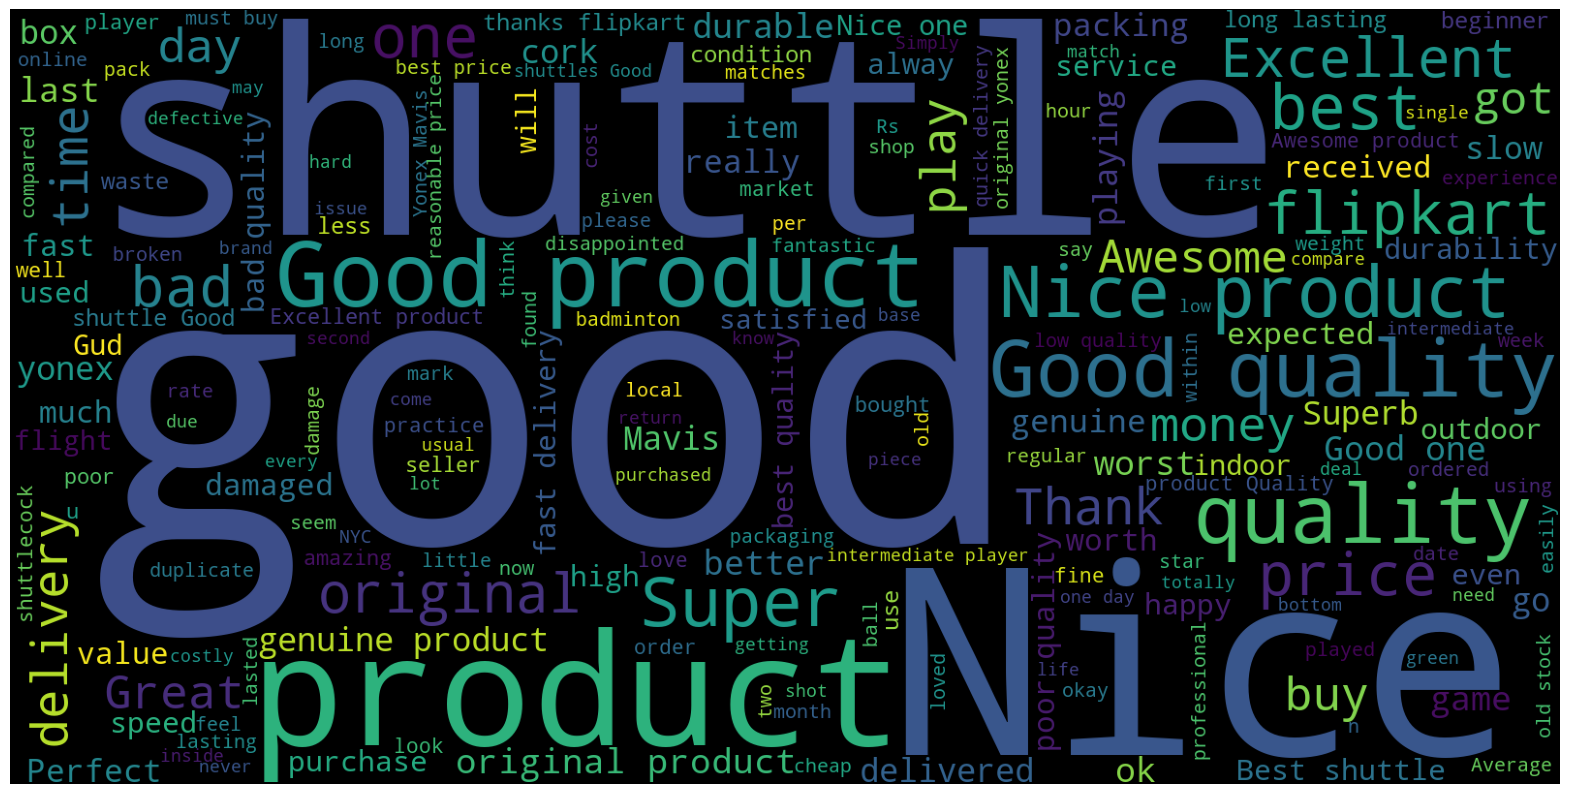

In [12]:
# Clean the data and convert it to a list of strings
cleaned_df = [str(text) for text in df['Review text'] if isinstance(text, str)]

# Generate WordCloud
wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(cleaned_df))

plt.figure(1,figsize=(20,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:

# removing the data where we don't want ratings=3.
df = df[df.Ratings != 3]

df.shape

(7438, 9)

In [14]:
# Select 'Review text' and 'sentiment' columns
review_sentiment_df = df[['Review text', 'sentiment']]

print(review_sentiment_df)


# Drop rows with missing values in 'Review text' and 'sentiment' columns
review_sentiment_df.dropna(subset=['Review text', 'sentiment'], inplace=True)

print(review_sentiment_df)


                                            Review text  sentiment
0     Nice product, good quality, but price is now r...          1
1     They didn't supplied Yonex Mavis 350. Outside ...          0
2     Worst product. Damaged shuttlecocks packed in ...          0
5              Good quality product. Delivered on time.          1
6     BEST PURCHASE It is a good quality and is more...          1
...                                                 ...        ...
8495  Thanks to the delivery boy ... Service is alwa...          1
8496  Over priced even after 50% discount price is m...          0
8497  Too much priced. It was getting me for Rs. 640...          0
8499  Hii flipkart customers care..why your delivery...          1
8507                                Nice delivery speed          1

[7438 rows x 2 columns]
                                            Review text  sentiment
0     Nice product, good quality, but price is now r...          1
1     They didn't supplied Yonex Mavi

C:\Users\visha\AppData\Local\Temp\ipykernel_3652\2596948333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_sentiment_df.dropna(subset=['Review text', 'sentiment'], inplace=True)


In [15]:
df.to_csv('batminton_data.csv', index=False)

1. Identify Inputs and Outputs

In [16]:
X = df['Review text']
y = df['sentiment']
print(X.shape, y.shape)

(7438,) (7438,)


In [17]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Split the Data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

X = df['Review text']
y = df['sentiment']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5578,) (5578,)
(1860,) (1860,)


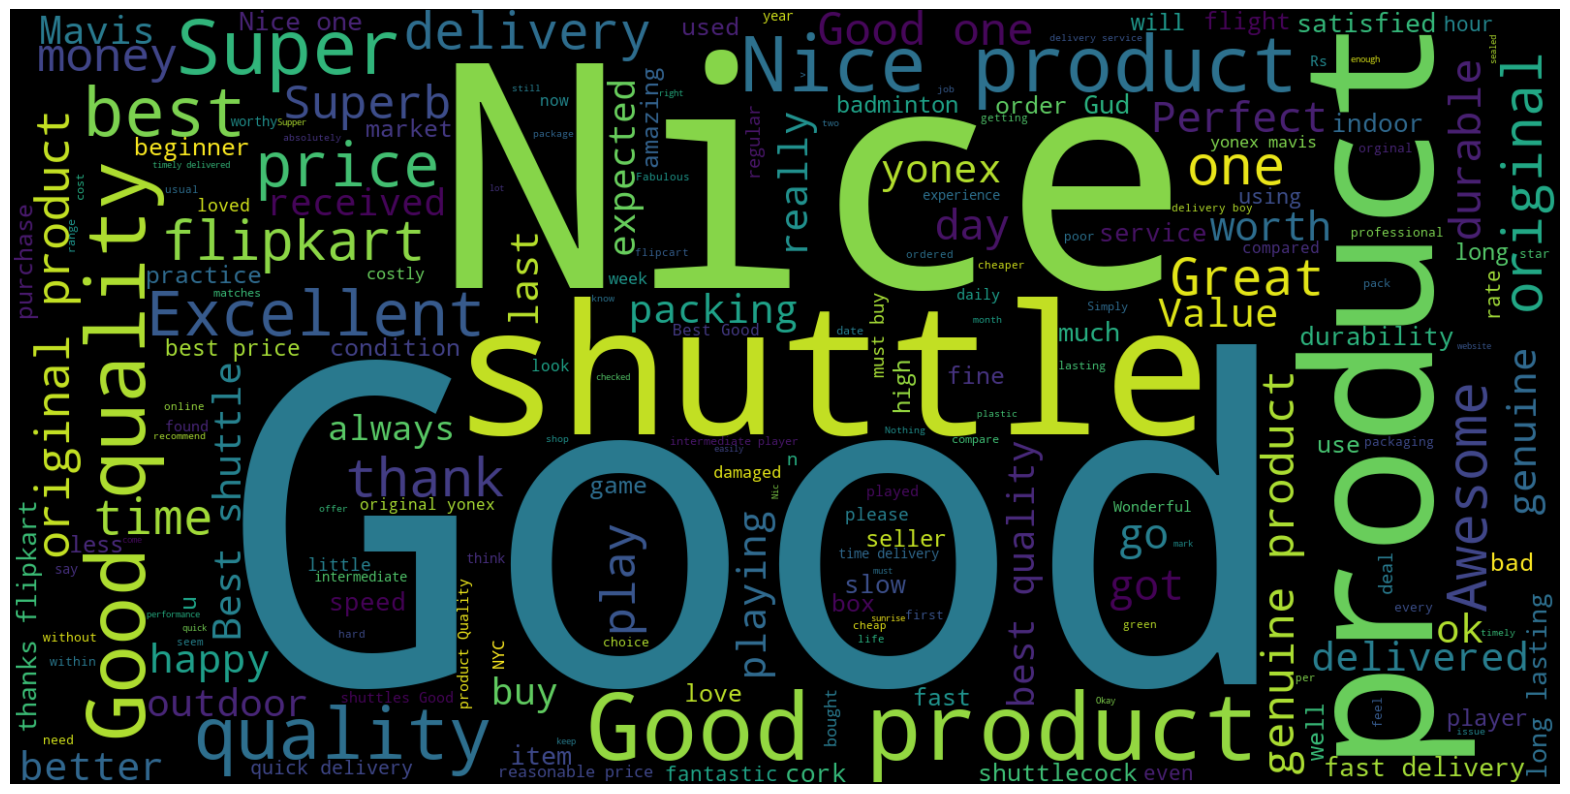

In [19]:
def display_wordcloud(data):
   
    cleaned_df = [str(text) for text in data if isinstance(text, str)]
    
    # Generate WordCloud
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(cleaned_df))
    

    plt.figure(figsize=(20, 20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming you have already defined X_train and y_train
display_wordcloud(X_train[y_train == 1])

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



def clean(doc): # doc is a string of text
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    doc = re.sub(r"[^a-zA-Z]", " ", doc)
    doc = re.sub(r'\W+', ' ', doc)
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = doc.lower()

    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))

    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    return " ".join(filtered_tokens)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean)

%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 453 ms
Wall time: 2.44 s
(5578, 2253)


Data Preprocessing on Test Data

In [23]:

X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1860, 2253)


In [24]:

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 2 ms


MultinomialNB()

Evaluating Train Data

In [25]:
from sklearn import metrics

y_train_pred = nb.predict(X_train_dtm)

print(metrics.accuracy_score(y_train, y_train_pred))

metrics.confusion_matrix(y_train, y_train_pred)

0.9406597346719254


array([[ 508,  256],
       [  75, 4739]], dtype=int64)

Evaluating Test Data

In [26]:

y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.932258064516129

In [27]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9662554796615354
Test Score (F1 Score): 0.9623205741626795


In [28]:

vect = CountVectorizer(preprocessor=clean, max_features=5000)
%time X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: total: 344 ms
Wall time: 1.39 s
(5578, 2253) (1860, 2253)


In [29]:

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 2.11 ms


MultinomialNB()

In [30]:

y_train_pred = nb.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)

0.9662554796615354

In [31]:

y_test_pred = nb.predict(X_test_dtm)

metrics.f1_score(y_test, y_test_pred)

0.9623205741626795

Optimal Workflow


In [32]:

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [33]:

import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [34]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 281 ms
Wall time: 1.31 s
CPU times: total: 62.5 ms
Wall time: 410 ms


In [36]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn' : Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)],
            'classifier__p' : [1, 2, 3]
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 250 ms
Wall time: 2.04 s
Score on Test Data:  0.9615153337342153
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 12.1 s
Wall time: 32 s
Score on Test Data:  0.9621749408983451
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 3min 33s
Wall time: 8min 57s
Score on Test Data:  0.9449938195302843
********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 5min 6s
Wall time: 9min 36s
Score on Test Data:  0.961254066844129
********** random_forest **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 11s
Wall time: 4min 52s
Score on Test Data:  0.9618504055271853


In [42]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'D:\\Innomatics_Internship_tasks\\ML_Task_SentimentAnalysis_Filpkart\\SentimentAnalysis_Flipkart_Review\\flask_app\\Best_Model\{name}.pkl')
    model = joblib.load(f'D:\\Innomatics_Internship_tasks\\ML_Task_SentimentAnalysis_Filpkart\\SentimentAnalysis_Flipkart_Review\\flask_app\\Best_Model\{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'D:\\Innomatics_Internship_tasks\\ML_Task_SentimentAnalysis_Filpkart\\SentimentAnalysis_Flipkart_Review\\flask_app\\Best_Model\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 10.5 ms
Test Score (F1) 0.9615153337342153
Model Size: 103687 Bytes
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 10.9 ms
Test Score (F1) 0.9621749408983451
Model Size: 70221 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 9.1 ms
Test Score (F1) 0.9449938195302843
Model Size: 76058 Bytes
********** knn **********
CPU times: total: 781 ms
Wall time: 183 ms
Test Score (F1) 0.961254066844129
Model Size: 352696 Bytes
********** random_forest **********
CPU times: total: 15.6 ms
Wall time: 73.6 ms
Test Score (F1) 0.9618504055271853
Model Size: 8350737 Bytes


In [60]:
from joblib import load

file_path = r"D:\Innomatics_Internship_tasks\ML_Task_SentimentAnalysis_Filpkart\SentimentAnalysis_Flipkart_Review\flask_app\Best_Model\naive_bayes.pkl"
model = load(file_path)

# Define the datapoint
datapoint = ["This is the second time i am getting an opened bundle of Yonex mavis 350 shuttle. I really believe this is not an original product, or someone may have switched the shuttle inside the bundle. Don't buy from flipkart. I am gonna return this product."]

# Prediction
prediction = model.predict(datapoint)

result = "Positive" if prediction[0] == 1 else "Negative"

print("Sentiment:", result)

Sentiment: Negative


In [61]:
from joblib import load

file_path = r"D:\Innomatics_Internship_tasks\ML_Task_SentimentAnalysis_Filpkart\SentimentAnalysis_Flipkart_Review\flask_app\Best_Model\naive_bayes.pkl"
model = load(file_path)
# Define the datapoint
datapoint = ["No one better shuttles in the market.good quality and reasonable price"]
# Prediction
prediction = model.predict(datapoint)

result = "Positive" if prediction[0] == 1 else "Negative"

print("Sentiment:", result)

Sentiment: Positive
